In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import statistics

In [13]:
col_list = ['id','rated','created_at','last_move_at','turns','victory_status','winner','increment_code','white_id','white_rating','black_id','black_rating','moves','opening_eco','opening_name','opening_ply']
data = pd.read_csv("games.csv",usecols=col_list)
winner = data.winner.tolist()[:750]
wRating = data.white_rating.tolist()[:750]
bRating = data.black_rating.tolist()
turns = data.turns.tolist()[:700]

In [14]:
avgRating = []
for i in range(700):
    avgRating.append((wRating[i]+bRating[i])/2)

In [15]:
x = np.array(avgRating)
y = np.array(turns)
m, b = np.polyfit(x, y, 1)

In [16]:
def getSlope(x,y):
    a=0.0
    b=0.0
    c=0.0
    d=0.0
    for i in range(len(x)-1):
        a+=x[i]*y[i]
        c+=math.pow(x[i],2)
    b = len(x)*statistics.mean(x)*statistics.mean(y)
    d = len(x)*math.pow(statistics.mean(x),2)
    m = (a-b)/(c-d)
    return m

In [17]:
slope = getSlope(avgRating,turns)
avgY = statistics.mean(turns)
avgX = statistics.mean(avgRating)

In [18]:
x0 = min(avgRating)
y0 = avgY + slope * (x0 - avgX)
x1 = max(avgRating)
y1 = avgY + slope * (x1 - avgX)


Text(0.5, 1.0, '# of Turns Taken vs. Average User Rating in 700 Matches on Lichess')

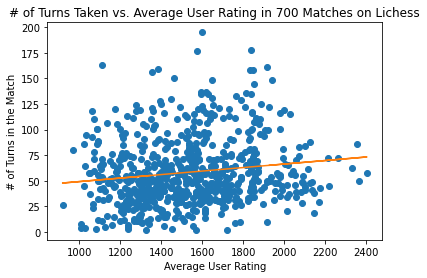

In [19]:
plt.plot(x, y, 'o')
plt.plot(x, m*x + b)
plt.ylabel("# of Turns in the Match")
plt.xlabel("Average User Rating")
plt.title("# of Turns Taken vs. Average User Rating in 700 Matches on Lichess")

<function matplotlib.pyplot.show(*args, **kw)>

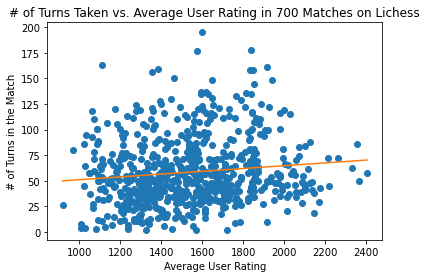

In [20]:
plt.show
plt.close
plt.plot(avgRating,turns,'o')
plt.plot([x0, x1], [y0, y1], '-')
plt.ylabel("# of Turns in the Match")
plt.xlabel("Average User Rating")
plt.title("# of Turns Taken vs. Average User Rating in 700 Matches on Lichess")
plt.show